In [1]:
def grafica_aleatoria(n,p):
    i = 1 #contador
    j = 1 #contador
    enlaces_ran = list() #definimos una lista que tendra los enlaces formados

    while i <= n: #bucle while que se encargara de ir realizando los enlaces
        lst_temp = list([i,j]) #definimos una lista temporal con los valores de i y j como candidatos a un enlace
        a = random.uniform(0,1) #definimos un random de numeros de entre 0 y 1
    
        if(i == j): #hacemos este if para evitar enlaces del tipo [1,1], [2,2], etc.
            j = j+1 #si eso pasa a j se le aumenta el valor en uno
        else: #de no ser asi
            if (a < p): #vemos si es posible el enlace revisando que a sea menor que p
                enlaces_ran.append(lst_temp) #de ser asi se agrega el par de nodos a la lista de enlaces
                j = 1+j #se aumenta el valor de j en uno por ejemplo si se forma el enlace [1,2] ahora veremos si se forma [1,3]
            else:
                j = 1+j #de no formarse el enlace aumentamos en uno a j
        if j==n: #cuando j alcance el valor maximo de nodos, ejemplo el usuario designo 5 nodos, j al alcanzar dicho valor
            j = 1 #retomara el valor de 1
            i = i+1 #y el valor de i aumentara en 1, asi hasta que i tenga el valor de los nodos dados por el usuario y terminar el bucle.
    red = arma_red(enlaces_ran)
    return(red)

In [2]:
def crea_mundo_pequeno(n,p):
    V = list(range(n)) #lista con los nodos del 0 a n-1
    
    red = list()
    
    for i in V:
        if(i+1 > n-1): #esto es por si estamos en el ultimo nodo
            red.append([i,n-n])
        else:
            red.append([i,i+1])
        if(i+2 > n-1): #esto es por si estamos en el ultimo o penultimo nodo
            red.append([i,(i-1)])
        else:
            red.append([i,i+2])
        if(i-1 < 0): #esto es por si estamos en el primer nodo
            red.append([i,n-1])
        else:
            red.append([i,i-1])
        if(i-2 < 0): #esto es por si estamos en el segundo nodo
            red.append([i,n-2])
        else:
            red.append([i,i-2])
    ##################################################################################################
    for i in red: #recorremos la red
        pos_i = i[0] #pos_i tendra el valor correspondiente a i[pos_i,pos_j]
        pos_j = i[1] #pos_j tendra el valor correspondiente a i[pos_i,pos_j]
        a = random.uniform(0,1) #a sera un valor random entre 0 y 1
        k = random.randrange(n-1) #k sera un valor random entre los nodos de la red
    
        if (k == pos_j): #si k es igual a pos_j buscamos un valor nuevo
            k = random.randrange(n-1)
        else:
            if(k == pos_i): #si k es igual a pos_i buscamos un valor nuevo
                k = random.randrange(n-1)
            else:
                if (a < p): #si a es menor a la probabilidad de enlace cambiamos el valor que hay en i[pos_j] por el de k
                    i[1] = k
    red2 = arma_red(red)
    return(red2)

Decidi colocar en una función a parte el armado de la red en base a los enlaces generados ya que es la misma funcion
para ambos metodos.

In [3]:
def arma_red(enlaces):
    red = {} #diccionario que representara la red final
    i = 0 #representara a la posición i : [i,j]
    j = 1 #representara a la posición j : [i,j]
    cont = 0  #contador para el set
    temp = set() #set temporal

    for valor in enlaces: #recorreremos la lista de enlaces creada
        if valor[i] == cont: #esto lo hacemos para cerciorarnos que en el diccionario tenga en sus llaves los valores correspondientes
            temp.add(valor[j]) #en un set temporal (set para evitar valores repetidos) agregamos lo que equivaldra al valor de la llave
        else:
            cont = cont+1 #si la llave es "n" pero en la lista dicho valor cambia a "n+1" valor, hacemos que la llave tenga valor de "n+1"
            temp = set() #reiniciamos el set temporal
            temp.add(valor[j]) #al hacer lo anterior puede generar el problema que no se agregue el primer valor de la nueva llave
            #por ejemplo si pasamos de [0,9] a [1,2],[1,3] no se guardara en el set el 2 asi que tenemos que hacer la adicion en 
            #esta parte del bucle
        
        temp2 = list(temp)
        up = {cont:temp2} #una vez tenemos todos los valores de la llave los agregamos al diccionario
        red.update(up)
    return(red) #retornamos la red resultante

Debido a que la función "densidad" fue creada antes que la función "arma_red" tiene la sigiente forma:

In [4]:
def densidad(red):
    enlaces = list() #Creamos una lista para los enlaces de la red
    i = 0 #contador
    contador = 0 #contador
    
    valores = list(red.values()) #llenamos una lista con los valores del diccionario de la red
    
    for cont in valores: #bucle que recorre la lista valores
        lst_temp = list(cont) #lst_temp tendra temporalmente los valores de cont
        i = i+1 
        for cont2 in lst_temp: #creamos un segundo bucle que recorrera lst_temp
            enlaces.append([i,cont2]) #agregamos los valores a la lista enlaces para que tengan la forma [1,2],[1,3]...[n,m]
    
    mg = len(enlaces)/2 #calculamos los enlaces presentes en la red
    mkn = (len(red)*(len(red)-1))/2 #claculamos los enlaces maximos en la red
   
    densidad = mg/mkn #calculamos la densidad de la red
    
    print('La densidad de la red es: ',densidad) #imprimimos el resultado

In [5]:
def calcula_grados_entrada(d_grafica):
    grado_e = {}

    for i in d_grafica:
        up = {i:len(d_grafica[i])}   
        grado_e.update(up)
    return(grado_e)

In [6]:
def dist_grados_entrada(grado_e):
    distr = {}
    lst_temp2 = list()

    for values in grado_e.values():      
        lst_temp2.append(values)
        lst_temp2.sort() 
    
    for i in lst_temp2: 
        llave = lst_temp2.count(i) 
        up2 = {i:llave} #imprimira los grandos de entrada como {grado de entrada:cantidad de nodos}
        distr.update(up2)
    print(distr)
    return(distr)

In [7]:
#revisar antes de enviar
def distr_normalizada(red):
    distr_norm = {}
    llave = 1
    valor = len(red)
    up3 = {llave:valor}
    distr_norm.update(up3)
    print(distr_norm)
    return(distr_norm)

In [8]:
def grafica_distr(distr):
    x = list()
    y = list()

    for i in distr:
        x.append(distr[i])
        y.append(i)
    plt.plot(x,y)
    plt.title('Distribución de Grados de Entrada')
    plt.xlabel('grado nodal')
    plt.ylabel('numero de nodos')
    plt.show()

In [9]:
def grafica_distr_norm(distr_norm):
    x2 = list()
    y2 = list()

    suma = sum(distr_norm.values())  

    for i in distr_norm:
        x2.append(distr_norm[i]) 
        valor = distr_norm[i]/suma 
        y2.append(valor)
    plt.plot(x2,y2)
    plt.title('Distribución Normalizada de Grados de Entrada')
    plt.xlabel('grado nodal')
    plt.ylabel('proporción de nodos')
    plt.show()

Numero de nodos: 15
Ingresa una probabilidad de enlace: 0.3
La red aleatoria resultante es: 
 {1: [10, 6], 2: [9, 10, 12, 14], 3: [2, 4, 6, 8, 9, 13, 14], 4: [2, 3, 5, 6, 9, 12], 5: [1, 2, 8, 9, 11, 13, 14], 6: [2, 4, 5, 8, 10, 14], 7: [2, 4, 6, 9, 10, 13, 14], 8: [9, 13, 4, 5], 9: [2, 11], 10: [9, 14, 6, 7], 11: [8, 10, 14, 7], 12: [1, 4, 7], 13: [8, 1, 3], 14: [4, 8, 9, 10, 12], 15: [8, 1, 11, 6]}

El mundo pequeno resultante es: 
 {0: [1, 2, 13, 14], 1: [8, 2, 3, 13], 2: [1, 3, 4, 7], 3: [2, 12, 5, 6], 4: [2, 3, 5, 6], 5: [0, 3, 6, 7], 6: [1, 4, 7], 7: [8, 9, 6], 8: [9, 10, 6, 7], 9: [10, 12, 13, 7], 10: [8, 9, 11, 12], 11: [9, 10, 12, 13], 12: [3, 4, 13, 14], 13: [11, 12, 14], 14: [13, 12, 5, 7]}

Para grafica aleatoria:
La densidad de la red es:  0.3238095238095238
Para mundo pequeno:
La densidad de la red es:  0.2714285714285714

Distribucion grados de entrada de la grafica aleatoria:
{2: 2, 3: 2, 4: 5, 5: 1, 6: 2, 7: 3}
Distribucion grados de entrada de mundo pequeno:
{3: 3, 4: 

<IPython.core.display.Javascript object>


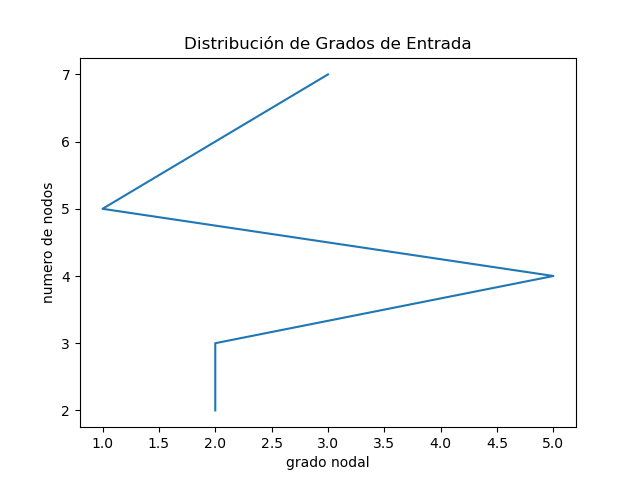

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import random

n = int(input('Numero de nodos: ')) #ingresamos el numero de nodos
p = float(input('Ingresa una probabilidad de enlace: ')) #ingresamos la probabilidad de enlace

##################################################################################
#creación de las redes
##################################################################################
red1 = grafica_aleatoria(n,p)
print('La red aleatoria resultante es: \n',red1)
red2 = crea_mundo_pequeno(n,p)
print('\nEl mundo pequeno resultante es: \n',red2)
##################################################################################
#Densidades
##################################################################################
print('\nPara grafica aleatoria:')
densidad(red1)
print('Para mundo pequeno:')
densidad(red2)
##################################################################################
#distribuciones
##################################################################################
print('\nDistribucion grados de entrada de la grafica aleatoria:')
grado1_e = calcula_grados_entrada(red1)
distr1 = dist_grados_entrada(grado1_e)
print('Distribucion grados de entrada de mundo pequeno:')
grado2_e = calcula_grados_entrada(red2)
distr2 = dist_grados_entrada(grado2_e)
##################################################################################
print('\nDistribucion normalizada de grafica aleatoria:')
distr_norm1 = distr_normalizada(distr1)
print('Distribucion normalizada de mundo pequeno:')
distr_norm2 = distr_normalizada(distr2)
##################################################################################
#Graficas de distribuciones
##################################################################################
print('\nPara grafica aleatoria:')
grafica_distr(distr1)

In [77]:
print('Para mundo pequeno:')
grafica_distr(distr2)

Para mundo pequeno:


In [78]:
print('Segunda para grafica aleatoria:')
grafica_distr_norm(distr_norm1)

Segunda para grafica aleatoria:


In [79]:
print('Segunda para mundo pequeno:')
grafica_distr_norm(distr_norm2)

Segunda para mundo pequeno:
